<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/v2/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data structure creating

In [ ]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc
        self.root_depth = None

In [ ]:
import networkx as nx

class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.tokens = []
        self.graph = None


    def add_token(self, token):
        self.tokens.append(token)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.tokens) > 0

    def create_graph(self):
      self.graph = nx.DiGraph()
      self.graph.add_node('0', word='root')
      for w in self.tokens:
        self.graph.add_node(w.id, word=w.form)
      for w in self.tokens:
        self.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

      for t in self.tokens:
          t.root_depth = nx.shortest_path_length(self.graph, '0', t.id) - 1

# Treebank data getting

In [ ]:
import os

def get_treebank_file(path):
    get_command = f"wget -m {path}"
    print(get_command)
    os.system(get_command)
    download_path = "/content/" + path.replace("https://", "")
    itog_path = "/content/" + path.split("/")[-1]
    mv_command = f"mv {download_path} {itog_path}"
    print(mv_command)
    os.system(mv_command)
    return itog_path

In [ ]:
def read_conll(filename):
    fh = open(filename,'r',encoding='utf-8')
    sents_read = 0
    sents = []
    comments = set()

    sent = Sentence()
    for line in fh:
        tok = line.strip().split('\t')
        if not tok or line.strip() == '': # empty line, add sentence to list
            if sent.is_not_empty:
                sents_read += 1
                sents.append(sent)
            sent = Sentence()
        else:
            if line[0] == '#' or '-' in tok[0]: # a comment line
                line = line.strip()
                if line[:12] == "# sent_id = ":
                    sent.set_sent_id(line[12:])
                elif line[:9] == "# text = ":
                    sent.set_text(line[9:])
                else:
                    comments.add(line)

            else: # an actual ConllEntry, add to tokens
                if tok[2] == "_":
                    tok[2] = tok[1].lower()

                token = ConllEntry(*tok)
                sent.add_token(token)
    fh.close()
    return sents


In [ ]:
treebank_info = { "rus" : "syntagrus"
                 , "ar": "padt"
                 , 'bdt': "bdt"
                 , 'fi': "tdt"
                 , 'he': "htb"
                 , 'hi': "hdtb"
                 , 'it': "isdt"
                 , 'ja': "gsd"
                 , 'ko': "gsd"
                 , 'sv': "talbanken"
                 , 'tr': "imst"
                 , 'eng': "ewt"
                 , 'chi': "gsd"
                 }

In [ ]:
treebank_paths = { 'rus': "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu"
                 , 'ar': "https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu"
                 , 'bdt': "https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu"
                 , 'fi': "https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-test.conllu"
                 , 'he': "https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-test.conllu"
                 , 'hi': "https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-test.conllu"
                 , 'it': "https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-test.conllu"
                 , 'ja': "https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-test.conllu"
                 , 'ko': "https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-test.conllu"
                 , 'sv': "https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-test.conllu"
                 , 'tr': "https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-test.conllu"
                 , 'eng': "https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu"
                 , 'chi': "https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu"
                 }

In [ ]:
treebanks = {}
for treebank_name, test_file in treebank_paths.items():
    itog_path = get_treebank_file(test_file)
    print(test_file)
    treebanks[treebank_name] = read_conll(itog_path)

wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu
https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu
wget -m https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu /content/ar_padt-ud-test.conllu
https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu
wget -m https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu /content/eu_bdt-ud-test.conllu
https://github.com/UniversalDependencies/UD_Basque-BDT/raw/r

In [ ]:
languages = treebanks.keys()
languages = sorted(list(languages))
print(languages)

['ar', 'bdt', 'chi', 'eng', 'fi', 'he', 'hi', 'it', 'ja', 'ko', 'rus', 'sv', 'tr']


## Ellipsis deleting

An ellipsis sentence contains a technical token whose index includes '.'

Such tokens must be deleted for the research

In [ ]:
[(t.id, t.form) for t in treebanks['rus'][3946].tokens]

[('1', 'Почему'), ('1.1', '_'), ('2', 'к'), ('3', 'нему'), ('4', '?')]

In [ ]:
def delete_point_tokens(s):
  s.tokens = [t for t in s.tokens if "." not in t.id]
  return s

sents = {}
for lang in languages:
    sents[lang] = [delete_point_tokens(s) for s in treebanks[lang]]

In [ ]:
[(t.id, t.form) for t in sents['rus'][3946].tokens]

[('1', 'Почему'), ('2', 'к'), ('3', 'нему'), ('4', '?')]

Creating dependency graphs via networkx


In [ ]:
for lang in languages:
    for sent in sents[lang]:
        sent.create_graph()

# Dataset sizes

In [ ]:
from collections import Counter
from itertools import groupby

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [ ]:
!mkdir /content/imgs

In [ ]:
def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

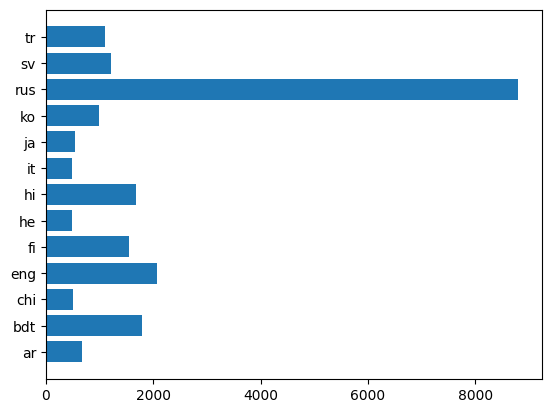

In [ ]:
plt.barh(languages, [len(sents[lang]) for lang in languages])
plt.savefig('imgs/dataset_sizes.eps', format='eps', dpi=300)
plt.show()

In [ ]:
for lang in languages:
  print(lang, treebank_info[lang], len(sents[lang]))

ar padt 680
bdt bdt 1799
chi gsd 500
eng ewt 2077
fi tdt 1555
he htb 491
hi hdtb 1684
it isdt 482
ja gsd 543
ko gsd 989
rus syntagrus 8800
sv talbanken 1219
tr imst 1100


In [ ]:
sorted([(lang, len(sents[lang])) for lang in languages], key=lambda x:-x[1])

[('rus', 8800),
 ('eng', 2077),
 ('bdt', 1799),
 ('hi', 1684),
 ('fi', 1555),
 ('sv', 1219),
 ('tr', 1100),
 ('ko', 989),
 ('ar', 680),
 ('ja', 543),
 ('chi', 500),
 ('he', 491),
 ('it', 482)]

# Количество токенов в предложении

In [ ]:
def token_length_group(s):
    if len(s.tokens) >= 50:
      return "50+"
    coeff = len(s.tokens) // 10
    return f"{coeff * 10}-{(coeff + 1) * 10}"

sentence_length_categories = ('0-10', '10-20', '20-30', '30-40', '40-50', '50+')

In [ ]:
lengths = {}
for lang in languages:
    lengths[lang] = Counter(map(token_length_group, sents[lang]))

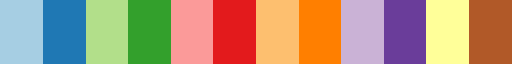

In [ ]:
colormaps['Paired']

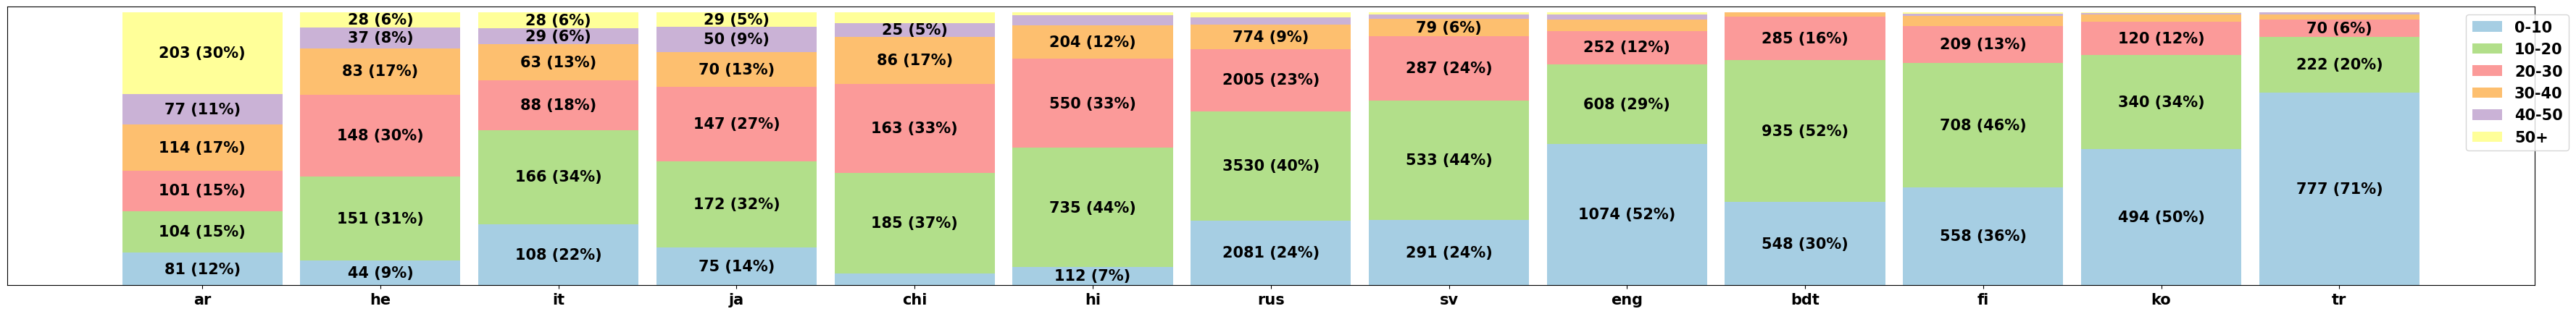

In [ ]:
plt.figure(figsize=(45,5))

length_languages = ['ar', 'he', 'it', 'ja', 'chi', 'hi', 'rus', 'sv', 'eng', 'bdt', 'fi', 'ko', 'tr']
bottom = np.zeros(len(length_languages))
width = 0.9
c_dict = {}
#all_colors = colormaps['Paired'].colors[:4] + (colormaps['Paired'].colors[6],) + colormaps['Paired'].colors[8:]
all_colors = colormaps['Paired'].colors[::2] + (colormaps['Paired'].colors[6],) + colormaps['Paired'].colors[8:]

for i, c in enumerate(sentence_length_categories):
    c_length = [lengths[lang][c] for lang in length_languages]
    c_rate_array = np.array([c_length[i] / lengths[lang].total() for i, lang in enumerate(length_languages)])
    p = plt.bar(length_languages, c_rate_array, width, bottom=bottom,
                label=c, color = all_colors[i])
    bottom += c_rate_array

    plt.bar_label(p, label_type='center',
                  labels = [f"{c_length[i]:.0f} ({v*100:.0f}%)" if v >= 0.05 else ""
                              for i, v in enumerate(c_rate_array)])
#plt.yaxis.set_visible(False)
plt.yticks([])
plt.ylim([0, 1.02])
plt.legend(bbox_to_anchor=(0.97, 1), loc='upper left')
plt.savefig('imgs/sentence_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

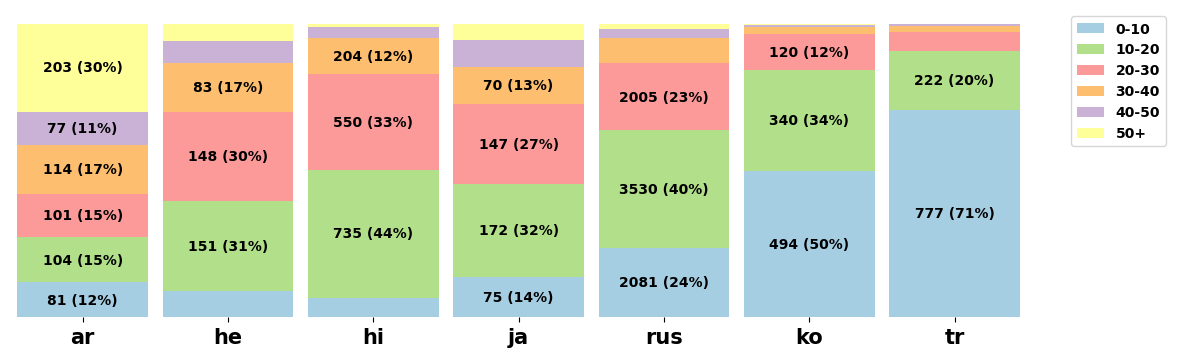

In [ ]:
plt.figure(figsize=(15,4))

border = 0.1
length_languages = ['ar', 'he', 'hi', 'ja', 'rus', 'ko', 'tr']
bottom = np.zeros(len(length_languages))
width = 0.9
c_dict = {}
# all_colors = colormaps['Paired'].colors[:4] + (colormaps['Paired'].colors[6],) + colormaps['Paired'].colors[8:]

all_colors = colormaps['Paired'].colors[::2] + (colormaps['Paired'].colors[6],) + colormaps['Paired'].colors[8:]
for i, c in enumerate(sentence_length_categories):
    c_length = [lengths[lang][c] for lang in length_languages]
    c_rate_array = np.array([c_length[i] / lengths[lang].total() for i, lang in enumerate(length_languages)])
    p = plt.bar(length_languages, c_rate_array, width, bottom=bottom,
                label=c, color = all_colors[i])
    bottom += c_rate_array

    plt.bar_label(p, label_type='center',
                  labels = [f"{c_length[i]:.0f} ({v*100:.0f}%)" if v >= border else ""
                              for i, v in enumerate(c_rate_array)], fontsize=10)#, weight='bold')
#plt.yaxis.set_visible(False)
plt.yticks([])
plt.xlim(-0.5, len(length_languages) + 0.5)
plt.ylim([0, 1.05])
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.legend(loc='best', fontsize=10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = "bold"
plt.savefig('imgs/sentence_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = "normal"

## Группировка датасетов по токенам

In [ ]:
import pandas as pd

In [ ]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.tokens):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, w.root_depth, sent_i))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "root_depth", "sent_i"])
    return info_df

In [ ]:
node_df_dict = {}
for lang in languages:
    node_df_dict[lang] = create_node_df(sents[lang])

In [ ]:
node_df_dict['rus'].head()

,id,parent_id,relation,pos,form,lemma,root_depth,sent_i
0,1,3,case,ADP,В,в,2,0
1,2,3,amod,ADJ,советский,советский,2,0
2,3,11,obl,NOUN,период,период,1,0
3,4,3,nmod,NOUN,времени,время,2,0
4,5,11,obj,NOUN,число,число,1,0


# Начальная форма

In [ ]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

ar 0.15
bdt 0.19
chi 0.34
eng 0.18
fi 0.24
he 0.20
hi 0.13
it 0.26
ja 0.25
ko 0.61
rus 0.10
sv 0.17
tr 0.20


rus 0.04

eng 0.07

chi 0.16

# Часть речи

In [ ]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['pos'])))

ar 16
bdt 17
chi 16
eng 17
fi 15
he 14
hi 15
it 15
ja 16
ko 14
rus 17
sv 17
tr 14


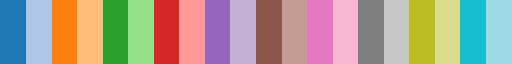

In [ ]:
colormaps['tab20']

In [ ]:
all_colors = list(colormaps['tab20'].colors[16:] + colormaps['tab20'].colors[1:8] + colormaps['tab20'].colors[9:14]) + [colormaps['tab20'].colors[8]]

In [ ]:
all_colors = all_colors[10:-1] + all_colors[:10] + [all_colors[-1]]

In [ ]:
pos_border = 0.05

In [ ]:
all_pos = set()
for lang in languages:
    all_pos |= set(node_df_dict[lang]['pos'])
all_pos = list(all_pos)
print(f"pos amount:{len(all_pos)}")

pos_colors = {}
for i, pos in enumerate(all_pos):
  pos_colors[pos] = all_colors[i]
pos_colors["OTHER"] = "peachpuff"

pos amount:17


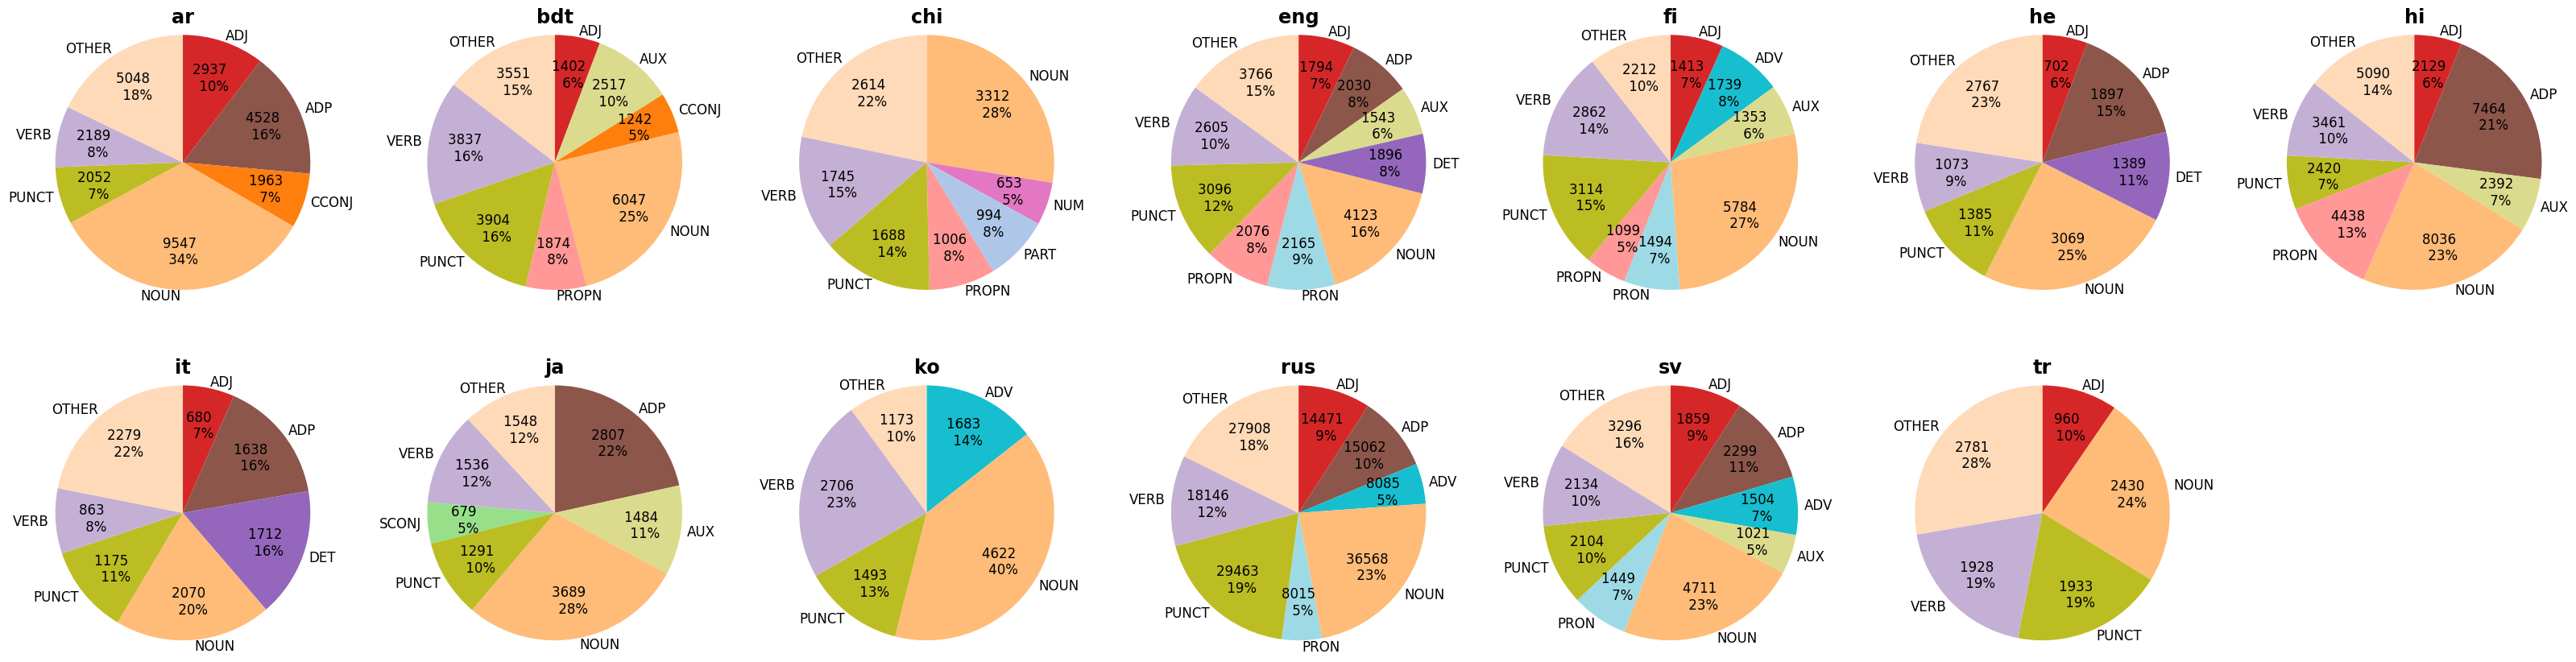

In [ ]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))
ax[-1, -1].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.3)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['pos'])
    pos_amount = pos_counter.total()
    pos_dict = {}
    other = 0
    others = []
    for label, value in pos_counter.items():
        if value / pos_amount <= pos_border:
            other += value
            others.append((label, value, round(value/pos_amount, 2)))
        else:
            pos_dict[label] = value
    #print(lang, len(others), others)
    labels = sorted(pos_dict)
    values = [pos_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [pos_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * pos_amount / 100:.0f} \n {d:.0f}%",
               counterclock=False, startangle=90, labeldistance=1.05,
               colors=colors, radius=1.2, pctdistance=0.7)
    cur_ax.set_title(lang, size=16, weight="bold", fontsize='x-large')

plt.savefig('imgs/pos_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
print(languages)

['ar', 'bdt', 'chi', 'eng', 'fi', 'he', 'hi', 'it', 'ja', 'ko', 'rus', 'sv', 'tr']


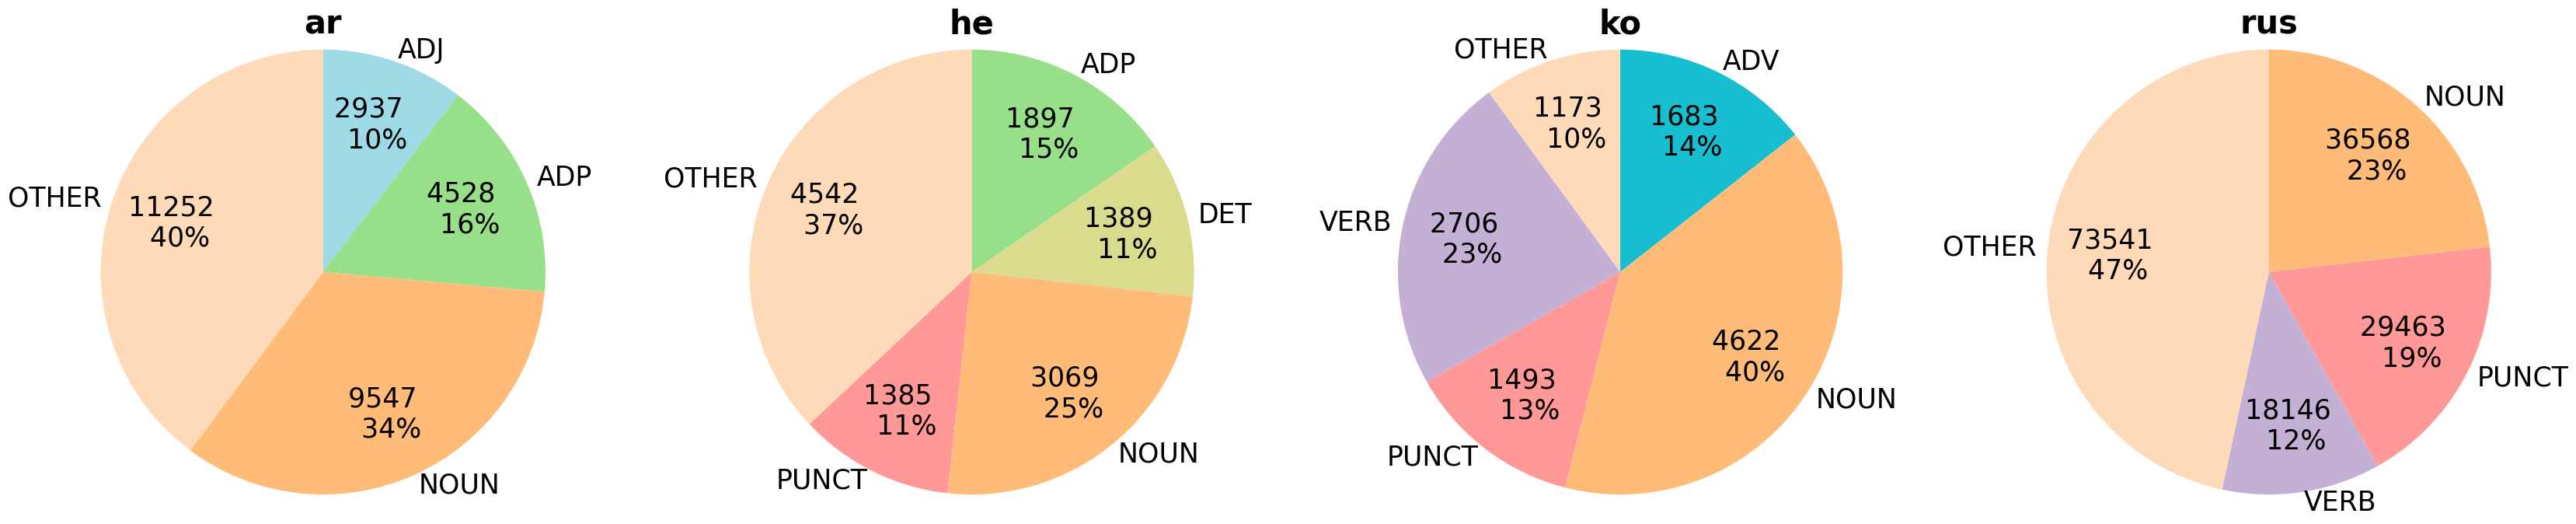

In [ ]:
x_count = 1
y_count = 4
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))
#ax[-1, -1].axis('off')
pos_border = 0.1
plt.subplots_adjust(wspace=0.4, hspace=0.3)
pos_languages = ['ar', 'he', 'ko', 'rus']
pos_colors["ADJ"] = colormaps['tab20'].colors[-1]
pos_colors["ADP"] = colormaps['tab20'].colors[5]
pos_colors["DET"] = colormaps['tab20'].colors[-3]
pos_colors["PUNCT"] = colormaps['tab20'].colors[7]
for i, lang in enumerate(pos_languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['pos'])
    pos_amount = pos_counter.total()
    pos_dict = {}
    other = 0
    others = []
    for label, value in pos_counter.items():
        if value / pos_amount <= pos_border:
            other += value
            others.append((label, value, round(value/pos_amount, 2)))
        else:
            pos_dict[label] = value
    #print(lang, len(others), others)
    labels = sorted(pos_dict)
    values = [pos_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [pos_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * pos_amount / 100:.0f} \n {d:.0f}%",
               counterclock=False, startangle=90, labeldistance=1.05,
               colors=colors, radius=1.2, pctdistance=0.7, textprops={'fontsize': 25})
    cur_ax.set_title(lang, size=30, weight="bold")

plt.savefig('imgs/pos_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


## relation

In [ ]:
#all_colors = colormaps['tab20b'].colors[7:] + colormaps['tab20b'].colors[:7]

In [ ]:
all_colors = colormaps['tab20c'].colors[:12] + colormaps['tab20b'].colors[1::2]

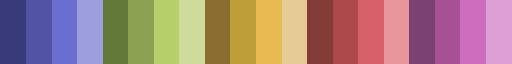

In [ ]:
colormaps['tab20b']

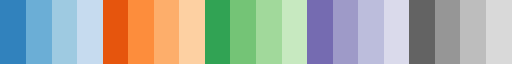

In [ ]:

colormaps['tab20c']

In [ ]:
len(all_colors)

22

In [ ]:
relation_border = 0.05

In [ ]:
all_rels = set()
for lang in languages:
    pos_counter = Counter(node_df_dict[lang]['relation'])
    all_rels |= {label for (label, value) in pos_counter.items()
                       if value / pos_counter.total() >= relation_border}
all_rels = list(all_rels)
print(f"relation amount with rate >= {relation_border}%:{len(all_rels)}")
rel_colors = {}
for i, relation in enumerate(all_rels):
  rel_colors[relation] = all_colors[i]
rel_colors["OTHER"] = "peachpuff"

relation amount with rate >= 0.05%:20


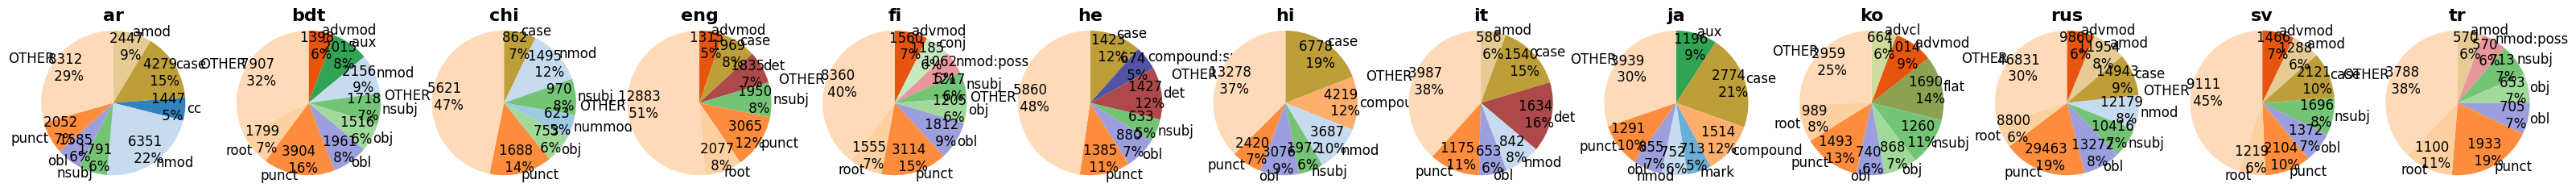

In [ ]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))

plt.subplots_adjust(wspace=0.3, hspace=0.3)
#ax[-1, -1].axis('off')
#ax[-1, -2].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    rel_counter = Counter(node_df_dict[lang]['relation'])
    rel_amount = rel_counter.total()
    relation_dict = {}
    other = 0
    for label, value in rel_counter.items():
        if value / rel_amount <= relation_border:
            other += value
        else:
            relation_dict[label] = value
    labels = sorted(relation_dict)
    values = [relation_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [rel_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * rel_amount / 100:.0f} \n {d:.0f}%",
               labeldistance=1.02, counterclock=False, startangle=90,
               colors=colors, radius=1.2, pctdistance=0.8)
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/relation_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


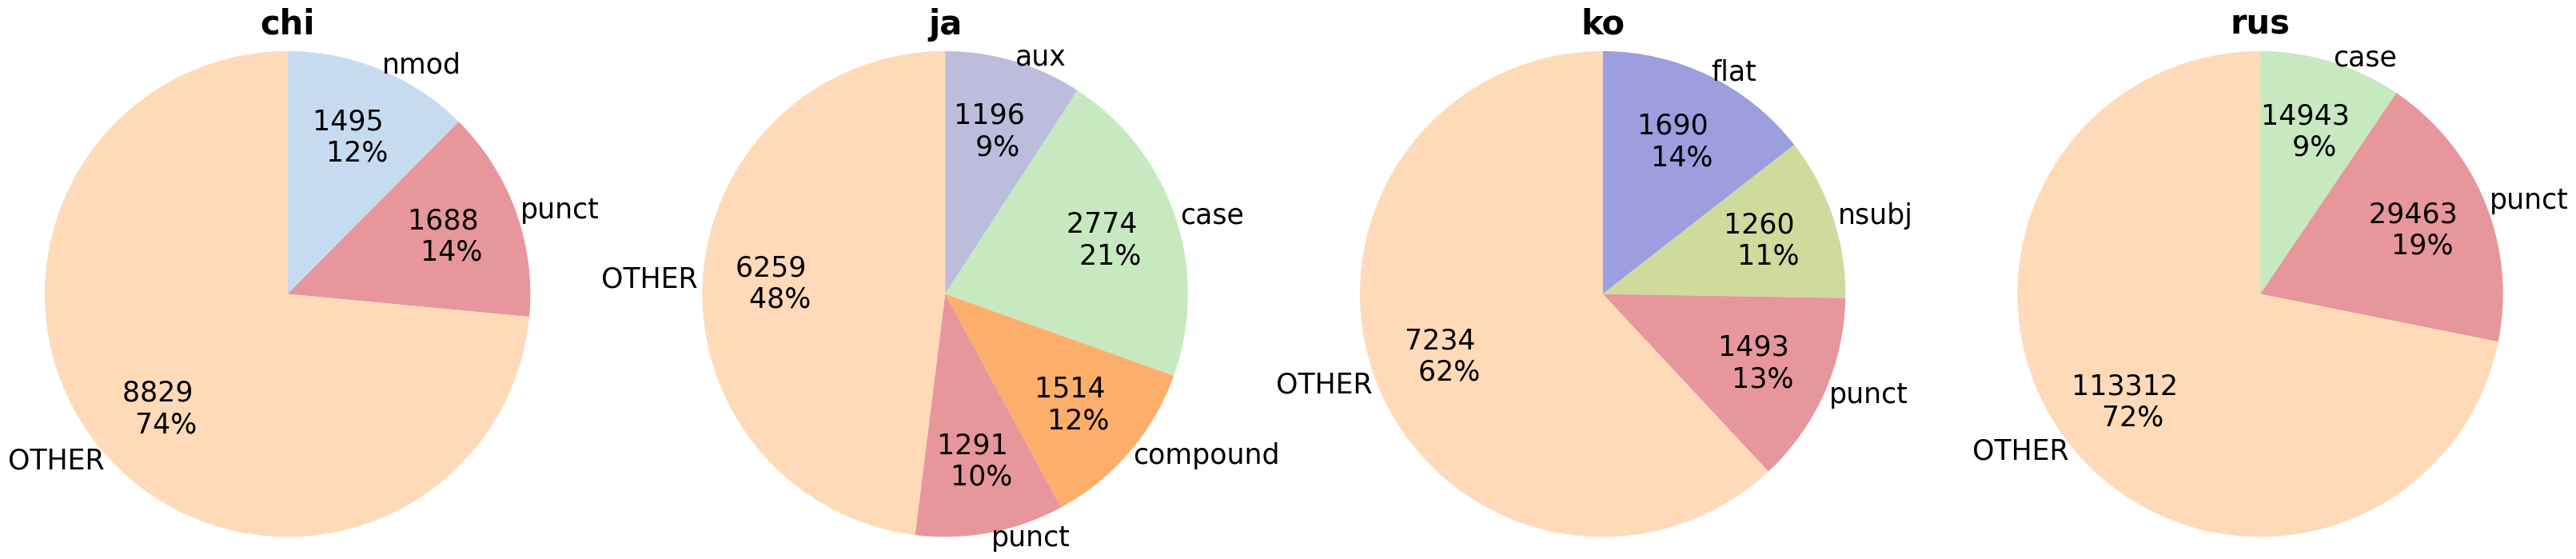

In [ ]:
x_count = 1
y_count = 4
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))
relation_border = 0.09
plt.subplots_adjust(wspace=0.3, hspace=0.3)
#ax[-1, -1].axis('off')
#ax[-1, -2].axis('off')
relation_languages = ['chi', 'ja', 'ko', 'rus']
rel_colors['aux'] = colormaps['tab20c'].colors[-6]
rel_colors['flat'] = colormaps['tab20b'].colors[3]
rel_colors['case'] = colormaps['tab20c'].colors[-9]
rel_colors['punct'] = colormaps['tab20b'].colors[-5]
rel_colors['nsubj'] = colormaps['tab20b'].colors[7]



for i, lang in enumerate(relation_languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    rel_counter = Counter(node_df_dict[lang]['relation'])
    rel_amount = rel_counter.total()
    relation_dict = {}
    other = 0
    for label, value in rel_counter.items():
        if value / rel_amount <= relation_border:
            other += value
        else:
            relation_dict[label] = value
    labels = sorted(relation_dict)
    values = [relation_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [rel_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * rel_amount / 100:.0f} \n {d:.0f}%",
               labeldistance=1.02, counterclock=False, startangle=90,
               colors=colors, radius=1.2, pctdistance=0.7, textprops={'fontsize': 25})
    cur_ax.set_title(lang, size=30, weight="bold")

plt.savefig('imgs/relation_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


# Dependency length

In [ ]:
from collections import Counter

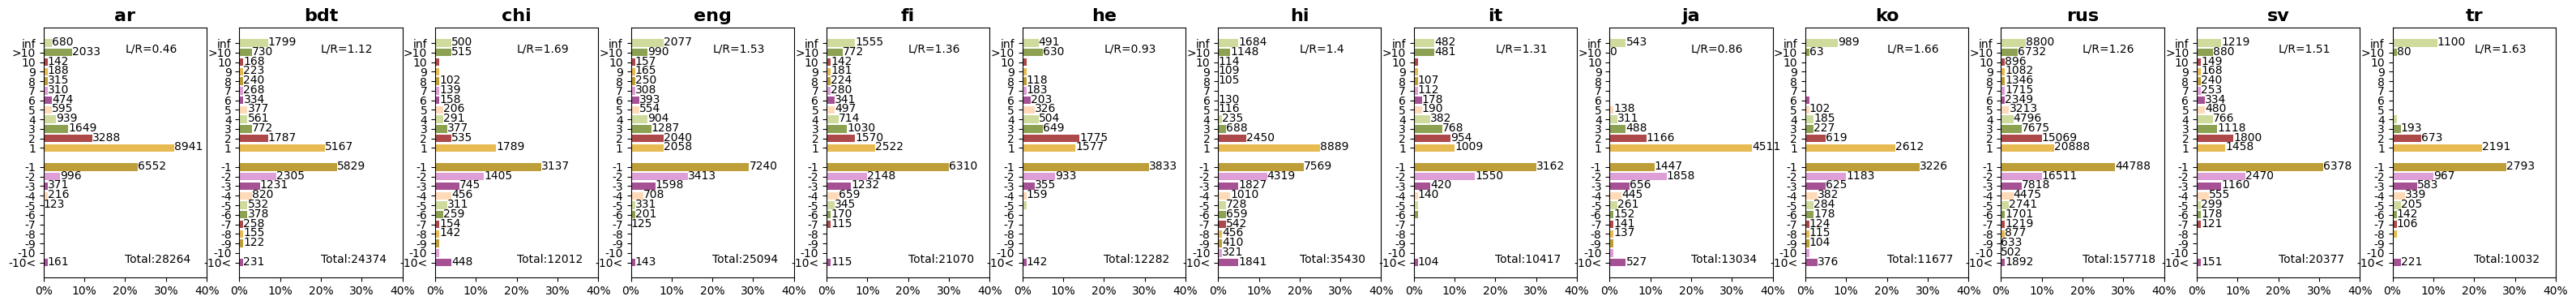

In [ ]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4))
#ax[-1, -1].axis('off')
x_values = list(range(0, 45, 10))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])

border = 10

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_dep_length = Counter((node_df_dict[lang]['id'].astype('int64') -
                            node_df_dict[lang]['parent_id'].astype('int64').replace(0, float('-inf'))))
    x = list(range(-border, 0)) + list(range(1, border + 1))
    total_lang = lang_dep_length.total()
    dep_lang = [round(lang_dep_length[i] / total_lang * 100, 0) for i in x]
    abs_less = sum(v for (k, v) in lang_dep_length.items() if k < -border)
    less = round(abs_less / total_lang * 100, 0)
    abs_great = sum(v for (k, v) in lang_dep_length.items() if k > border and k != float('inf'))
    great = round(abs_great / total_lang * 100, 0)
    abs_inf = lang_dep_length[float("inf")]
    inf = round(abs_inf / total_lang * 100, 0)
    more_depth = [less] + dep_lang + [great, inf]
    cur_ax.barh([-border - 1] + x + [border + 1, border + 2], more_depth,
                tick_label= [f"-{border}<"] + x + [f">{border}", "inf"], color=colors)
    cur_ax.set_xlim([0, 40])
    l_r = round(((node_df_dict[lang]['id'].astype('int64') < node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum()
          /  ((node_df_dict[lang]['id'].astype('int64') > node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum(), 2)
    cur_ax.text(20, border + 1, f"L/R={l_r}")
    cur_ax.text(20, -border - 1, f"Total:{total_lang}")

    cur_ax.text(less, -border - 1.25, str(abs_less))
    cur_ax.text(great, border + 0.75, str(abs_great))
    cur_ax.text(inf, border + 1.75, str(abs_inf))
    for index, value in zip(x, dep_lang):
        if lang_dep_length[index] > 100:
            cur_ax.text(value, index - 0.25, lang_dep_length[index])
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/dependency_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


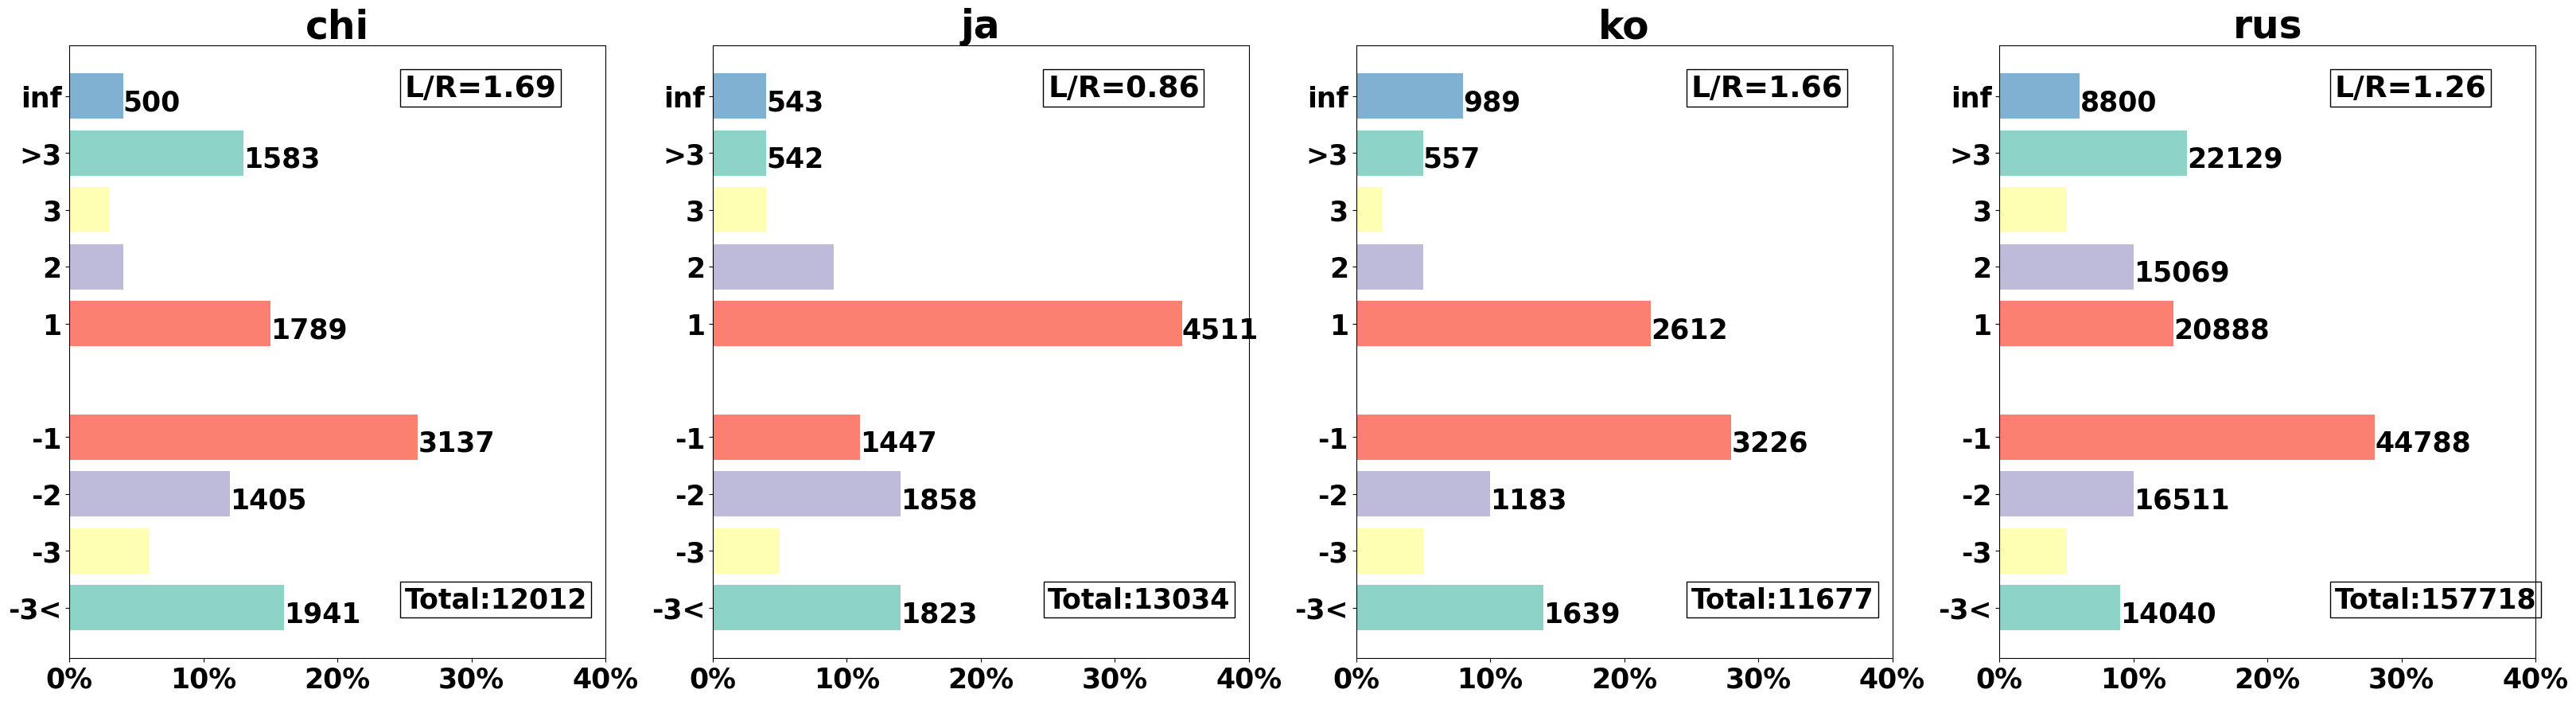

In [ ]:
x_count = 1
y_count = 4
colors = list(colormaps["Set3"].colors[0:4]) + list(colormaps["Set3"].colors[0:4])[::-1] +  \
    [ colormaps["Set3"].colors[4]]
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))
#ax[-1, -1].axis('off')
x_values = list(range(0, 45, 10))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])

border = 3
dependency_length_languages = ['chi', 'ja', 'ko', 'rus']
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(dependency_length_languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_dep_length = Counter((node_df_dict[lang]['id'].astype('int64') -
                            node_df_dict[lang]['parent_id'].astype('int64').replace(0, float('-inf'))))
    x = list(range(-border, 0)) + list(range(1, border + 1))
    total_lang = lang_dep_length.total()
    dep_lang = [round(lang_dep_length[i] / total_lang * 100, 0) for i in x]
    abs_less = sum(v for (k, v) in lang_dep_length.items() if k < -border)
    less = round(abs_less / total_lang * 100, 0)
    abs_great = sum(v for (k, v) in lang_dep_length.items() if k > border and k != float('inf'))
    great = round(abs_great / total_lang * 100, 0)
    abs_inf = lang_dep_length[float("inf")]
    inf = round(abs_inf / total_lang * 100, 0)
    more_depth = [less] + dep_lang + [great, inf]
    cur_ax.barh([-border - 1] + x + [border + 1, border + 2], more_depth,
                tick_label= [f"-{border}<"] + x + [f">{border}", "inf"], color=colors)
    cur_ax.set_xlim([0, 40])
    l_r = round(((node_df_dict[lang]['id'].astype('int64') < node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum()
          /  ((node_df_dict[lang]['id'].astype('int64') > node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum(), 2)
    cur_ax.text(25, border + 2, f"L/R={l_r}", fontsize=27, weight="bold",
                bbox=dict(facecolor='none', edgecolor='black'))
    cur_ax.text(25, -border - 1, f"Total:{total_lang}", fontsize=25, weight="bold",
                bbox=dict(facecolor='none', edgecolor='black'))

    cur_ax.text(less, -border - 1.25, str(abs_less), fontsize=25, weight="bold")
    cur_ax.text(great, border + 0.75, str(abs_great), fontsize=25, weight="bold")
    cur_ax.text(inf, border + 1.75, str(abs_inf), fontsize=25, weight="bold")
    for index, value in zip(x, dep_lang):
        if lang_dep_length[index] > 100 and value >= 10:
            cur_ax.text(value, index - 0.25, lang_dep_length[index], fontsize=25, weight="bold")
    cur_ax.set_title(lang, size=35, weight="bold")
    cur_ax.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('imgs/dependency_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


# Root depth

In [ ]:
from collections import Counter

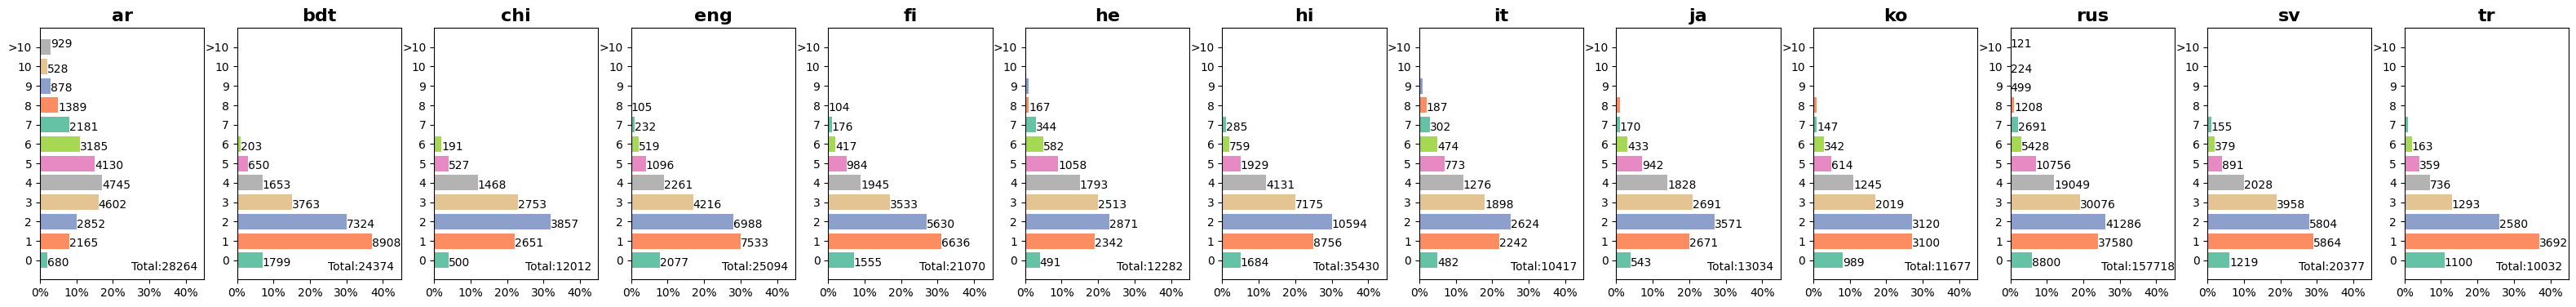

In [ ]:
x_count = 1
y_count = 13
f, ax = plt.subplots(x_count, y_count, figsize=(40, 4))
#ax[-1, -1].axis('off')
x_values = list(range(0, 45, 10))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])
border = 10

colors = colormaps["Set2"].colors[:3] + colormaps["Set2"].colors[6:] + colormaps["Set2"].colors[3:5]

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_root_depths = Counter(node_df_dict[lang]['root_depth'].astype('int64'))
    x = list(range(0, border + 1))
    total_lang = lang_root_depths.total()
    depth_lang = [round(lang_root_depths[i] / total_lang * 100, 0) for i in x]
    abs_great = sum(v for (k, v) in lang_root_depths.items() if k > border)
    great = round(abs_great / total_lang * 100, 0)
    more_depth = depth_lang + [great]
    cur_ax.barh(x + [border + 1], more_depth, tick_label= x + [f">{border}"], color=colors)
    for index, value in enumerate(more_depth):
        if index != len(more_depth) - 1:
          if lang_root_depths[index] > 100:
            cur_ax.text(value, index - 0.3, f"{lang_root_depths[index]:.0f}", fontsize=25)
        else:
          if abs_great > 100:
            cur_ax.text(value, index, f"{abs_great:.0f}", fontsize=25)

    cur_ax.text(25, -0.5, f"Total:{total_lang}", fontsize=25)

    cur_ax.set_xlim([0, 45])
    cur_ax.set_title(lang, size=25, weight="bold")
    cur_ax.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('imgs/depth_root.eps', format='eps', dpi=300, bbox_inches='tight')

plt.show()


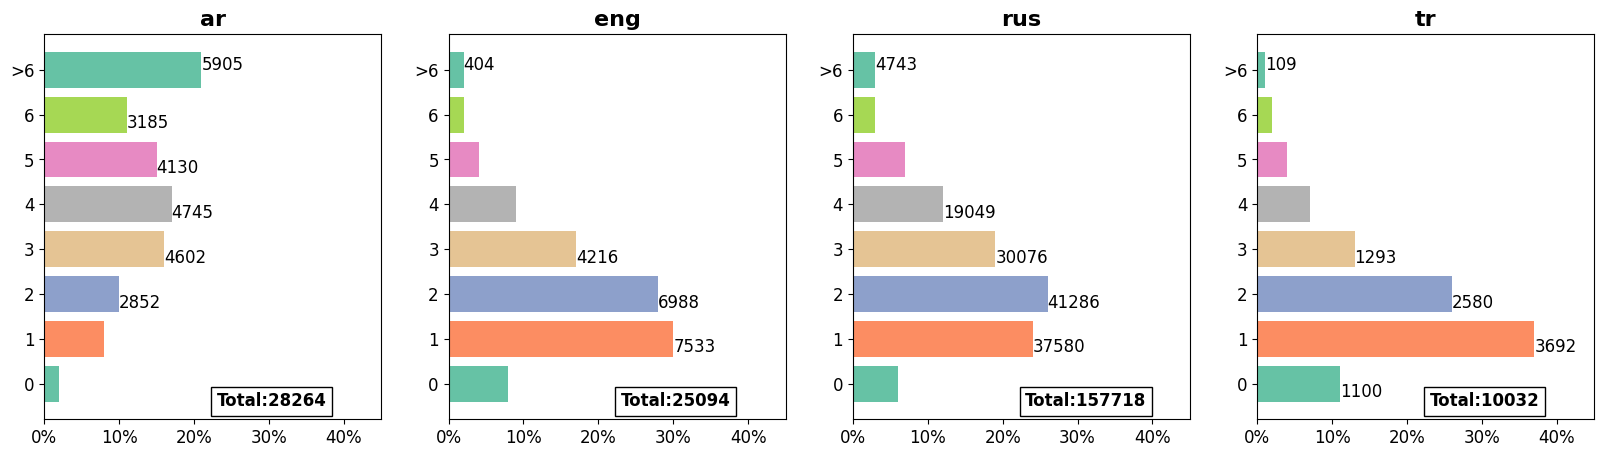

In [ ]:
x_count = 1
y_count = 4
f, ax = plt.subplots(x_count, y_count, figsize=(20, 5))
#ax[-1, -1].axis('off')
x_values = list(range(0, 45, 10))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])
border = 6

colors = colormaps["Set2"].colors[:3] + colormaps["Set2"].colors[6:] + colormaps["Set2"].colors[3:5]
root_depth_languages = ['ar', 'eng', 'rus', 'tr']
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(root_depth_languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_root_depths = Counter(node_df_dict[lang]['root_depth'].astype('int64'))
    x = list(range(0, border + 1))
    total_lang = lang_root_depths.total()
    depth_lang = [round(lang_root_depths[i] / total_lang * 100, 0) for i in x]
    abs_great = sum(v for (k, v) in lang_root_depths.items() if k > border)
    great = round(abs_great / total_lang * 100, 0)
    more_depth = depth_lang + [great]
    cur_ax.barh(x + [border + 1], more_depth, tick_label= x + [f">{border}"], color=colors)
    for index, value in enumerate(more_depth):
        if index != len(more_depth) - 1:
          if lang_root_depths[index] >= 100 and value >= 10:
            cur_ax.text(value, index - 0.3, f"{lang_root_depths[index]:.0f}")
        else:
          if abs_great > 100:
            cur_ax.text(value, index, f"{abs_great:.0f}")

    cur_ax.text(23, -0.5, f"Total:{total_lang}", weight="bold",
                bbox=dict(facecolor='none', edgecolor='black'))

    cur_ax.set_xlim([0, 45])
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/depth_root.eps', format='eps', dpi=300, bbox_inches='tight')

plt.show()


# Image downloading

In [ ]:
!zip -r /content/imgs.zip /content/imgs

  adding: content/imgs/ (stored 0%)
  adding: content/imgs/dataset_sizes.eps (deflated 70%)
  adding: content/imgs/pos_pies.eps (deflated 75%)
  adding: content/imgs/dependency_length.eps (deflated 90%)
  adding: content/imgs/sentence_length.eps (deflated 81%)
  adding: content/imgs/relation_pies.eps (deflated 77%)
  adding: content/imgs/depth_root.eps (deflated 88%)


In [ ]:
from google.colab import files
files.download("/content/imgs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>